In [1]:
import os
os.environ["MXNET_CUDNN_LIB_CHECKING"] = "0"
os.environ["MXNET_CUDNN_AUTOTUNE_DEFAULT"] = "0"
import sys
import numpy as np
import mxnet as mx
from mxnet import  autograd, context
from mxnet.base import MXNetError
import time
from collections import Counter
import rasterio
from rasterio.features import geometry_mask
from sklearn.model_selection import train_test_split
import random
import geopandas as gpd
from shapely.geometry import box
from pyproj import CRS


path_to_adds = [r"D:\Source\MasterThesis", 
                r"D:\Source\MasterThesis\examples\Metadata.py", 
                r"D:\Source\MasterThesis\examples\image_Dictionary.py", 
                r"D:\Source\MasterThesis\examples\myModel.py",
                r"D:\Source\MasterThesis\examples\myPlots.py"]
for path_to_add in path_to_adds:
    if path_to_add not in sys.path:
        sys.path.append(path_to_add)
        
# Remove duplicates while preserving order
sys.path = list(dict.fromkeys(sys.path))
import myModel
from image_Dictionary import ImageDict
import const
from my_Save import saveAsCSV, SaveModels
from mx_Train import myTrain
from decode.postprocessing.instance_segmentation import InstSegm
from myPlots import lossPlot, visualize_all



ctx=context.gpu()
mx.nd.waitall()
numberOfimages = 648
#Function to load images and masks and Preprocessing
images= ImageDict(const.images_2022, False)
image_dict  = images.load_tif_files(numberOfimages = numberOfimages)
masks = ImageDict(const.masks_2022, True)
mask_dict  = masks.load_tif_files(image_dict, numberOfimages = numberOfimages)
train_ids, val_ids = train_test_split(list(mask_dict.keys()), test_size=0.2, random_state=42)
print(len(image_dict))
output_directory = rf"D:\Source\Output\Result_2022\VNIR\{numberOfimages}"
os.makedirs(output_directory, exist_ok=True)
print(output_directory)
print('******************************************************************')

def get_images(ids, image_dict):
    data=  np.array([image_dict[id].image for id in ids])
    print( data.shape )
    return mx.nd.array(data)

train_images =get_images(train_ids, image_dict)
train_masks = get_images(train_ids, mask_dict)
val_images = get_images(val_ids, image_dict)
val_masks = get_images(val_ids, mask_dict)

batch_size=4

try:
    train_dataset = mx.gluon.data.ArrayDataset(train_images, train_masks)
    train_loader = mx.gluon.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=0,shuffle=True)
    val_loader = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(val_images, val_masks), batch_size=batch_size, num_workers=0, shuffle=False)

except Exception as e:
    print(f"Error creating data loaders: {e}")

print('******************************************************************')
for a, b in train_loader:
    print(b.shape)
print('------------')
for a, b in val_loader:
    print(b.shape)

output_models= rf"{output_directory}\models"
print(output_models)

Image contains NaN values 6920.tif.
Corrupted or invalid image: 6920.tif
648
D:\Source\Output\Result_2022\VNIR\648
******************************************************************
(511, 4, 256, 256)
(511, 6, 256, 256)
(128, 4, 256, 256)
(128, 6, 256, 256)
******************************************************************
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 256)
(4, 6, 256, 

i am training
depth:= 0, nfilters: 32, nheads::8, widths::1
depth:= 1, nfilters: 64, nheads::16, widths::1
depth:= 2, nfilters: 128, nheads::32, widths::1
depth:= 3, nfilters: 256, nheads::64, widths::1
depth:= 4, nfilters: 512, nheads::128, widths::1
depth:= 5, nfilters: 1024, nheads::256, widths::1
depth:= 6, nfilters: 512, nheads::256, widths::1
depth:= 7, nfilters: 256, nheads::128, widths::1
depth:= 8, nfilters: 128, nheads::64, widths::1
depth:= 9, nfilters: 64, nheads::32, widths::1
depth:= 10, nfilters: 32, nheads::16, widths::1
Start training now
Epoch 0: Current Learning Rate = 0.0001


Training Epoch 0: 100%|██████████| 128/128 [16:13<00:00,  7.61s/it]


Training Loss: 0.6045889467932284
--------------------------------------------------------------


Validation Epoch 0: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]


Validation Loss: 0.5937643330544233
****************************************************************
Epoch 1: Current Learning Rate = 0.0001


Training Epoch 1: 100%|██████████| 128/128 [15:13<00:00,  7.13s/it]


Training Loss: 0.5900016012601554
--------------------------------------------------------------


Validation Epoch 1: 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]


Validation Loss: 0.5867301486432552
****************************************************************
Epoch 2: Current Learning Rate = 0.0001


Training Epoch 2: 100%|██████████| 128/128 [14:14<00:00,  6.68s/it]


Training Loss: 0.585746371652931
--------------------------------------------------------------


Validation Epoch 2: 100%|██████████| 32/32 [00:19<00:00,  1.65it/s]


Validation Loss: 0.5825104601681232
****************************************************************
Epoch 3: Current Learning Rate = 0.0001


Training Epoch 3: 100%|██████████| 128/128 [14:42<00:00,  6.89s/it]


Training Loss: 0.5826351675204933
--------------------------------------------------------------


Validation Epoch 3: 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]


Validation Loss: 0.5806594099849463
****************************************************************
Epoch 4: Current Learning Rate = 0.0001


Training Epoch 4: 100%|██████████| 128/128 [14:22<00:00,  6.74s/it]


Training Loss: 0.5800177128985524
--------------------------------------------------------------


Validation Epoch 4: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s]


Validation Loss: 0.5798854101449251
****************************************************************
Epoch 5: Current Learning Rate = 0.0001


Training Epoch 5: 100%|██████████| 128/128 [14:16<00:00,  6.69s/it]


Training Loss: 0.5775639303028584
--------------------------------------------------------------


Validation Epoch 5: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]


Validation Loss: 0.5766376461833715
****************************************************************
Epoch 6: Current Learning Rate = 0.0001


Training Epoch 6: 100%|██████████| 128/128 [14:52<00:00,  6.97s/it]


Training Loss: 0.5755388191901147
--------------------------------------------------------------


Validation Epoch 6: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5760063882917166
****************************************************************
Epoch 7: Current Learning Rate = 0.0001


Training Epoch 7: 100%|██████████| 128/128 [14:31<00:00,  6.81s/it]


Training Loss: 0.574257941916585
--------------------------------------------------------------


Validation Epoch 7: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5732349511235952
****************************************************************
Epoch 8: Current Learning Rate = 0.0001


Training Epoch 8: 100%|██████████| 128/128 [14:30<00:00,  6.80s/it]


Training Loss: 0.5721200602129102
--------------------------------------------------------------


Validation Epoch 8: 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]


Validation Loss: 0.5717892665416002
****************************************************************
Epoch 9: Current Learning Rate = 0.0001


Training Epoch 9: 100%|██████████| 128/128 [14:23<00:00,  6.75s/it]


Training Loss: 0.5710925739258528
--------------------------------------------------------------


Validation Epoch 9: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5705847181379795
****************************************************************
Epoch 10: Current Learning Rate = 0.0001


Training Epoch 10: 100%|██████████| 128/128 [14:59<00:00,  7.03s/it]


Training Loss: 0.5697209783829749
--------------------------------------------------------------


Validation Epoch 10: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


Validation Loss: 0.5694753341376781
****************************************************************
Epoch 11: Current Learning Rate = 0.0001


Training Epoch 11: 100%|██████████| 128/128 [14:50<00:00,  6.95s/it]


Training Loss: 0.568527968134731
--------------------------------------------------------------


Validation Epoch 11: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5691918097436428
****************************************************************
Epoch 12: Current Learning Rate = 0.0001


Training Epoch 12: 100%|██████████| 128/128 [14:50<00:00,  6.96s/it]


Training Loss: 0.5688180211000144
--------------------------------------------------------------


Validation Epoch 12: 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]


Validation Loss: 0.5697208270430565
****************************************************************
Epoch 13: Current Learning Rate = 0.0001


Training Epoch 13: 100%|██████████| 128/128 [14:24<00:00,  6.75s/it]


Training Loss: 0.5678893509320915
--------------------------------------------------------------


Validation Epoch 13: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5682105496525764
****************************************************************
Epoch 14: Current Learning Rate = 0.0001


Training Epoch 14: 100%|██████████| 128/128 [14:10<00:00,  6.65s/it]


Training Loss: 0.5672550839371979
--------------------------------------------------------------


Validation Epoch 14: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.567388292402029
****************************************************************
Epoch 15: Current Learning Rate = 0.0001


Training Epoch 15: 100%|██████████| 128/128 [14:47<00:00,  6.93s/it]


Training Loss: 0.5664438023231924
--------------------------------------------------------------


Validation Epoch 15: 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]


Validation Loss: 0.5672213491052389
****************************************************************
Epoch 16: Current Learning Rate = 0.0001


Training Epoch 16: 100%|██████████| 128/128 [14:56<00:00,  7.01s/it]


Training Loss: 0.5658817542716861
--------------------------------------------------------------


Validation Epoch 16: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]


Validation Loss: 0.5672705601900816
****************************************************************
Epoch 17: Current Learning Rate = 0.0001


Training Epoch 17: 100%|██████████| 128/128 [13:45<00:00,  6.45s/it]


Training Loss: 0.5659992820583284
--------------------------------------------------------------


Validation Epoch 17: 100%|██████████| 32/32 [00:18<00:00,  1.72it/s]


Validation Loss: 0.5667093433439732
****************************************************************
Epoch 18: Current Learning Rate = 0.0001


Training Epoch 18: 100%|██████████| 128/128 [15:05<00:00,  7.07s/it]


Training Loss: 0.5652075363323092
--------------------------------------------------------------


Validation Epoch 18: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


Validation Loss: 0.5667146015912294
****************************************************************
Epoch 19: Current Learning Rate = 0.0001


Training Epoch 19: 100%|██████████| 128/128 [14:55<00:00,  6.99s/it]


Training Loss: 0.5652640946209431
--------------------------------------------------------------


Validation Epoch 19: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


Validation Loss: 0.5672295838594437
****************************************************************
Epoch 20: Current Learning Rate = 0.0001


Training Epoch 20: 100%|██████████| 128/128 [14:40<00:00,  6.88s/it]


Training Loss: 0.5655848672613502
--------------------------------------------------------------


Validation Epoch 20: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5668945759534836
Reducing learning rate to 5e-05
****************************************************************
Epoch 21: Current Learning Rate = 5e-05


Training Epoch 21: 100%|██████████| 128/128 [14:19<00:00,  6.72s/it]


Training Loss: 0.5644185934215784
--------------------------------------------------------------


Validation Epoch 21: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5668876674026251
****************************************************************
Epoch 22: Current Learning Rate = 5e-05


Training Epoch 22: 100%|██████████| 128/128 [14:48<00:00,  6.94s/it]


Training Loss: 0.5635804538615048
--------------------------------------------------------------


Validation Epoch 22: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5669475235044956
****************************************************************
Epoch 23: Current Learning Rate = 5e-05


Training Epoch 23: 100%|██████████| 128/128 [14:26<00:00,  6.77s/it]


Training Loss: 0.5639231563545763
--------------------------------------------------------------


Validation Epoch 23: 100%|██████████| 32/32 [00:18<00:00,  1.71it/s]


Validation Loss: 0.5673143621534109
Reducing learning rate to 2.5e-05
****************************************************************
Epoch 24: Current Learning Rate = 2.5e-05


Training Epoch 24: 100%|██████████| 128/128 [14:45<00:00,  6.92s/it]


Training Loss: 0.5632158508524299
--------------------------------------------------------------


Validation Epoch 24: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5671789925545454
****************************************************************
Epoch 25: Current Learning Rate = 2.5e-05


Training Epoch 25: 100%|██████████| 128/128 [14:19<00:00,  6.71s/it]


Training Loss: 0.562909456435591
--------------------------------------------------------------


Validation Epoch 25: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]


Validation Loss: 0.5666668489575386
****************************************************************
Epoch 26: Current Learning Rate = 2.5e-05


Training Epoch 26: 100%|██████████| 128/128 [14:31<00:00,  6.81s/it]


Training Loss: 0.5627867230214179
--------------------------------------------------------------


Validation Epoch 26: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.5672834198921919
Reducing learning rate to 1.25e-05
****************************************************************
Epoch 27: Current Learning Rate = 1.25e-05


Training Epoch 27: 100%|██████████| 128/128 [14:20<00:00,  6.73s/it]


Training Loss: 0.5621169083751738
--------------------------------------------------------------


Validation Epoch 27: 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


Validation Loss: 0.566761177033186
Early stopping triggered
Data saved to D:\Source\Output\Result_2022\VNIR\648\loss.csv
Index(['Current Epoch', 'Training Loss', 'Validation Loss'], dtype='object')


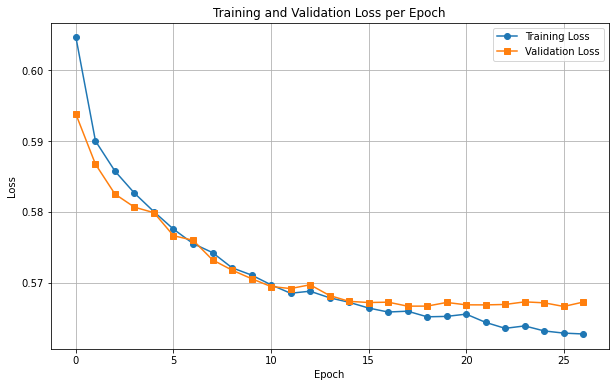

In [9]:
# Maximum number of retries
max_retries = 5
retry_count = 0

# Retry logic
while retry_count < max_retries:
    try:
        mxTn = myTrain(train_loader, val_loader)
        loss_each_epoch, model_list, epoch = mxTn.train(ctx)
        saveAsCSV(["Current Epoch", "Training Loss", "Validation Loss"], rf"{output_directory}\loss.csv", loss_each_epoch)
        SaveModels(output_models, model_list)
        lossPlot(loss_each_epoch, output_directory)
        break
    except MXNetError  as e:
        if 'CUDNN_STATUS_EXECUTION_FAILED' in str(e):
            print(f"cuDNN execution failed. Retrying... ({retry_count + 1}/{max_retries})")
            
            # Clear GPU memory
            mx.nd.waitall()
            
            # Wait for a few seconds before retrying
            time.sleep(5)
            
            # Increment the retry counter
            retry_count += 1
        else:
            # If it's another error, raise it
            raise

# Check if maximum retries were reached
if retry_count == max_retries:
    print("Maximum retries reached. Training failed due to cuDNN error.")

In [12]:
def calculate_iou(mask, prediction):
    """
    Calculate the Intersection over Union (IoU) between a ground truth mask and a predicted mask.
    
    Parameters:
    - mask: Ground truth binary mask (numpy array)
    - prediction: Predicted binary mask (numpy array)
    
    Returns:
    - IoU score (float)
    """
    # Ensure the inputs are binary (0 or 1)
    mask = mask.astype(bool)
    prediction = prediction.astype(bool)

    # Calculate Intersection and Union
    intersection = np.logical_and(mask, prediction).sum()
    union = np.logical_or(mask, prediction).sum()

    # Handle edge case to avoid division by zero
    if union == 0:
        return 1.0 if intersection == 0 else 0.0

    # Calculate IoU
    iou_score = intersection / union
    print(f'IOU:{iou_score}')
    return iou_score



# Function to calculate IoU between shapefile and GeoTIFF
def calculate_iou_2010(id, prediction, currentMetadata):
    mask_path = os.path.join(r'D:\Source\Output\IACS_2010', f'tile_{str(id)}.shp')
    print(mask_path)
    gdf = gpd.read_file(mask_path)

    # Ensure CRS is passed as a string
    target_crs = CRS.from_user_input(currentMetadata.crs)
    # Transform the CRS
    gdf = gdf.to_crs(target_crs)

    # Create a mask from the shapefile geometries
    mask = geometry_mask(gdf.geometry, transform=currentMetadata.transform, invert=True, out_shape=currentMetadata.shape)
    return calculate_iou(mask, prediction)


def get_model_file_name():
    # Get all files in the folder
    files = os.listdir(output_models)

    # Print the result
    if files:
        last_file = os.path.join(output_models, f'model_VNIR_{len(files)-1}.params')
        print(f"The last file with full path is: {last_file}")
        return last_file
    else:
        print("The folder is empty.")

def visualize_predictions(modelPath, result_path, image_dict, val_ids, t_ext = 0.3, t_bound = 0.2, is2022 = True):    
    print("Starting visualization")
    print(f't_ext = {t_ext}, t_bound = {t_bound}')
     
    netPredict = myModel.MyFractalResUNetcmtsk(True, modelPath, ctx)
    ious=[]
    threshold = 0.5
    csv_file_path =""
    for id in val_ids:  # Limit to 'num_images' for visualization
        print(f"Processing image ID: {id}")
        try:
            img = images.getImage(id, image_dict, ctx)
            
            currentMetadata = image_dict[id]
            with autograd.predict_mode():  
                outputs = netPredict.net(img) 
                pred_segm  = np.array(outputs[0][0,1,:,:].asnumpy())
                pred_bound =  np.array(outputs[1][0,1,:,:].asnumpy())

                #Apply threshold to pred_segm
                pred_segm_binary = (pred_segm > threshold).astype(np.float32)
                print("Shape of pred_segm:", pred_segm.shape, "Shape of pred_bound:", pred_bound.shape, "Shape of binary_extent_mask:", pred_segm_binary.shape)
                print("NaNs in pred_segm:", np.isnan(pred_segm).sum(), "NaNs in binary_extent_mask:", np.isnan(pred_segm_binary).sum())

                inst =InstSegm(pred_segm_binary, pred_bound, t_ext=t_ext, t_bound=t_bound)   # perform instance segmentation
                print("NaNs in inst:", np.isnan(inst).sum())
                inst = np.nan_to_num(inst, nan=1)

                # Ensure the mask is binary
                inst = np.where(inst > 1, 0, 1).astype(np.uint8)
                print(f'inst_Unique_labels: {np.unique(inst)}')

                #visualize_segmentation(id, inst, result_path)
                visualize_all(id, img, currentMetadata, outputs, pred_segm, pred_bound, inst, result_path)
        
                # Load the segmentation mask
                segmentation_mask = np.array(pred_segm)
        
                # Get unique labels
                #print("Unique Labels:", np.unique(pred_segm))
          
                # Check how many `nan` values are in the mask
                #print(f"Number of NaN values in the mask: {np.isnan(segmentation_mask).sum()}")

                #label_counts = Counter(segmentation_mask.flatten())
                #print("Label Distribution:", label_counts)
                
                if is2022:
                    mask_path = os.path.join(const.masks_2022, f'{str(id)}.tif')
                    csv_file_path = os.path.join(output_directory, str(id), "iou.csv")
                    with rasterio.open(mask_path) as src:
                        mask = src.read(1)
                        iou_score= calculate_iou(mask, inst)
                        
                if not is2022:
                    csv_file_path = os.path.join(output_directory, str(id), "iou.csv")
                    iou_score= calculate_iou_2010(id, inst, currentMetadata)

                ious.append({
                    "ID": id,
                    "IOU": iou_score
                    }) 
        except Exception as e:
            print(f"Error processing image ID {id}: {e}")
    
  
    #csv_file_path = os.path.join(output_directory, "iou.csv")
    saveAsCSV(["ID", "IOU"], csv_file_path, ious)

In [9]:
def visualize(output_directory, image_dict, val_ids, is2022 = True):
    # Maximum number of retries
    max_retries = 5
    retry_count = 0

    # Retry logic
    while retry_count < max_retries:
        try:
            # Create result directory
            result_path = os.path.join(output_directory, "result", "vnir")
            os.makedirs(result_path, exist_ok=True)

            # Clear pending computations in the GPU
            mx.nd.waitall()

            # Choose a random validation ID
            random_val_ids = random.choice(val_ids)

            # Run the visualization function
            visualize_predictions(
            rf"{get_model_file_name()}",
            result_path,
            image_dict,
            [random_val_ids],
            t_ext=0.2,
            t_bound=0.1,
            is2022 = is2022
            )

            # If successful, break out of the loop
            print("Visualization completed successfully.")
            break

        except MXNetError as e:
            # Handle cuDNN execution errors
            if "CUDNN_STATUS_EXECUTION_FAILED" in str(e):
                retry_count += 1
                print(f"cuDNN execution failed. Retrying... ({retry_count}/{max_retries})")

                # Clear GPU memory
                mx.nd.waitall()

                # Wait for a few seconds before retrying
                time.sleep(5)
            else:
                # For any other MXNet errors, raise the exception
                print(f"MXNet error occurred: {e}")
                raise

        except Exception as e:
            # Handle any unexpected errors
            print(f"Unexpected error: {type(e).__name__}: {e}")
            raise

    # If maximum retries are reached, print an error message
        if retry_count == max_retries:
            print("Maximum retries reached. Visualization failed due to cuDNN error.")


# Applying model in 2022 images

The last file with full path is: D:\Source\Output\Result_2022\VNIR\648\models\model_VNIR_26.params
Starting visualization
t_ext = 0.2, t_bound = 0.1
depth:= 0, nfilters: 32, nheads::8, widths::1
depth:= 1, nfilters: 64, nheads::16, widths::1
depth:= 2, nfilters: 128, nheads::32, widths::1
depth:= 3, nfilters: 256, nheads::64, widths::1
depth:= 4, nfilters: 512, nheads::128, widths::1
depth:= 5, nfilters: 1024, nheads::256, widths::1
depth:= 6, nfilters: 512, nheads::256, widths::1
depth:= 7, nfilters: 256, nheads::128, widths::1
depth:= 8, nfilters: 128, nheads::64, widths::1
depth:= 9, nfilters: 64, nheads::32, widths::1
depth:= 10, nfilters: 32, nheads::16, widths::1
Processing image ID: 371
Shape of pred_segm: (256, 256) Shape of pred_bound: (256, 256) Shape of binary_extent_mask: (256, 256)
NaNs in pred_segm: 0 NaNs in binary_extent_mask: 0
NaNs in inst: 4704
inst_Unique_labels: [0 1]
Saved polygons to D:\Source\Output\Result_2022\VNIR\648\result\vnir\371


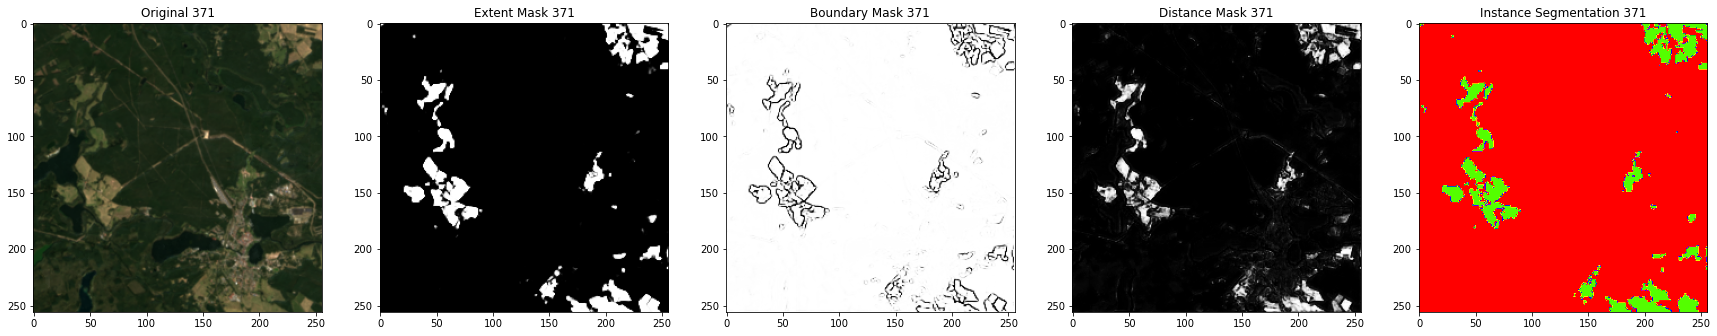

Complete plotting 371
IOU:0.5166324435318275
Unexpected error: FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Source\\Output\\Result_2022\\VNIR\\648\\371\\iou.csv'


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Source\\Output\\Result_2022\\VNIR\\648\\371\\iou.csv'

In [14]:
visualize(output_directory, image_dict, val_ids)

# Applying model in 2010 images

In [14]:
images_2010 = ImageDict(const.images_2010, False)
testimage = 5
image_2010_dict = images_2010.load_tif_files(numberOfimages=testimage)
print(image_2010_dict.keys())
output_directory_2010 = rf"D:\Source\Output\Result_2010\VNIR\{testimage}"
os.makedirs(output_directory_2010, exist_ok=True)
print(output_directory_2010)

dict_keys([100, 115, 116, 117, 132])
D:\Source\Output\Result_2010\VNIR\5


27
The last file with full path is: D:\Source\Output\Result_2022\VNIR\648\models\model_VNIR_26.params
Starting visualization
t_ext = 0.2, t_bound = 0.1
depth:= 0, nfilters: 32, nheads::8, widths::1
depth:= 1, nfilters: 64, nheads::16, widths::1
depth:= 2, nfilters: 128, nheads::32, widths::1
depth:= 3, nfilters: 256, nheads::64, widths::1
depth:= 4, nfilters: 512, nheads::128, widths::1
depth:= 5, nfilters: 1024, nheads::256, widths::1
depth:= 6, nfilters: 512, nheads::256, widths::1
depth:= 7, nfilters: 256, nheads::128, widths::1
depth:= 8, nfilters: 128, nheads::64, widths::1
depth:= 9, nfilters: 64, nheads::32, widths::1
depth:= 10, nfilters: 32, nheads::16, widths::1
Processing image ID: 117
Shape of pred_segm: (256, 256) Shape of pred_bound: (256, 256) Shape of binary_extent_mask: (256, 256)
NaNs in pred_segm: 0 NaNs in binary_extent_mask: 0
NaNs in inst: 24394
inst_Unique_labels: [0 1]
Saved polygons to D:\Source\Output\Result_2010\VNIR\5\result\vnir\117


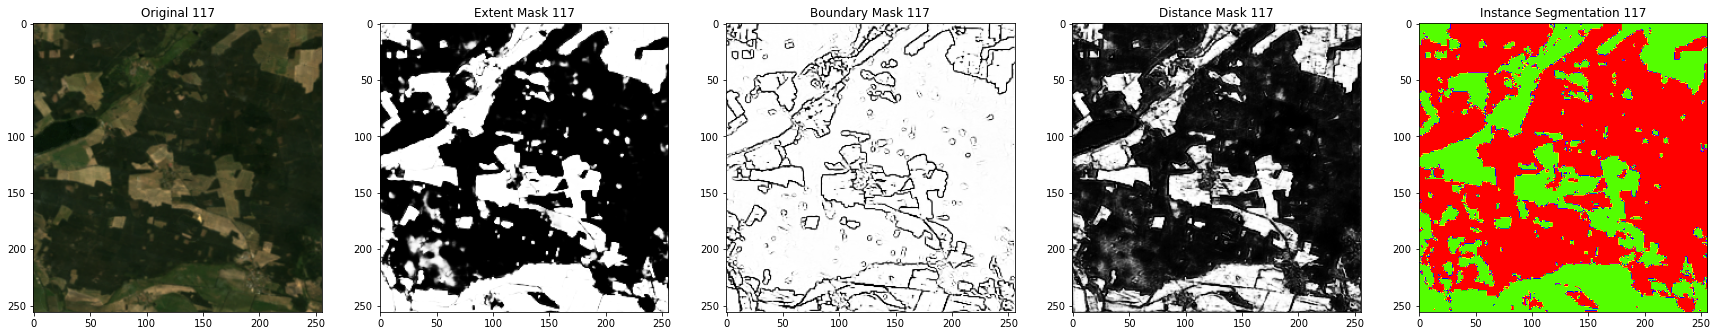

Complete plotting 117
Unique Labels: [2.1523398e-05 2.4012928e-05 2.7132415e-05 ... 9.9988711e-01 9.9991846e-01
 9.9992025e-01]
Number of NaN values in the mask: 0
here
D:\Source\Output\IACS_2010\tile_117.shp
IOU:0.7368930082611324
Data saved to D:\Source\Output\Result_2010\VNIR\5\result\vnir\117\iou.csv
Visualization completed successfully.


In [24]:
visualize(output_directory_2010, image_2010_dict, list(image_2010_dict.keys()), is2022= False)